In [1]:
_ = """
Classification Problem:
~~~~~~~~~~~~~~~~~~~~~~~
1. Gathering Data
2. Preparating the Data
3. Choosing the Model
4. Training
5. Evaluation
6. Hyper parameter tuning
7. Prediction
"""

### 1. Gathering Data

**Use the pre-defined test dataset:**

Banknote authentication Data Set:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

* Description:
    * Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

* Attributes:
    1. variance of Wavelet Transformed image (continuous)
    2. skewness of Wavelet Transformed image (continuous)
    3. curtosis of Wavelet Transformed image (continuous)
    4. entropy of image (continuous)
    5. class (integer)

### 2. Preparating the Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data_file = "data_banknote_authentication.txt"
columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Decision"]

In [ ]:
df = pd.read_csv(data_file, sep=",", names=columns, encoding="utf-8")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Decision    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Decision
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [19]:
df.Decision.value_counts()

0    762
1    610
Name: Decision, dtype: int64

Decision Records:
* 0 - Genuine --> 762 samples
* 1 - Forged  --> 610 samples


In [25]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Decision
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


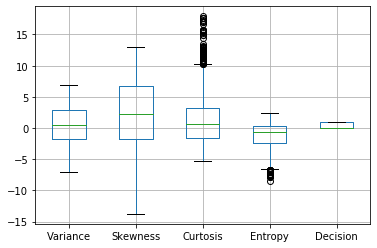

In [27]:
df.boxplot()

/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b2fae10>,
      dtype=object)

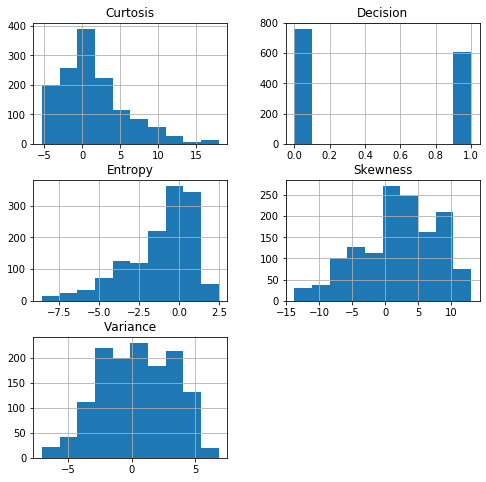

In [28]:
plt.close()
fig = plt.figure(figsize = (8,8))
df.hist(ax = fig.gca())

In [22]:
df.corr()

,Variance,Skewness,Curtosis,Entropy,Decision
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Decision,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [31]:
def correlation_matrix(df, labels):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    plt.close()
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=10,rotation=45)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [60]:
labels = ["Index"] + columns
print(labels)

['Index', 'Variance', 'Skewness', 'Curtosis', 'Entropy', 'Decision']


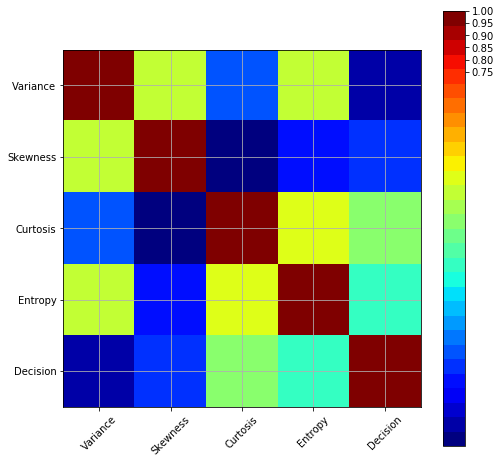

In [61]:
correlation_matrix(df, ["index"] + columns)

In [16]:
# Data is clean no further cleaning is needed, lets split the dataset.

In [62]:
# Split data to training and test
from sklearn.model_selection import train_test_split

In [63]:
# define X [features] & y [predictable attribute]
X = df.drop('Decision', axis=1)
y = df['Decision']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X_train shape: ",X_train.shape) # 1097 rows, 4 columns
print("y_train shape: ",y_train.shape) # 1097 rows, 1 column

print("X_test shape: ",X_test.shape) # 275 rows, 4 columns
print("y_test shape: ",y_test.shape) # 275 rows, 1 column

X_train shape:  (1097, 4)
y_train shape:  (1097,)
X_test shape:  (275, 4)
y_test shape:  (275,)


### 3. Choosing the Model - use the Decision Tree Classifier

In [69]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [65]:
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### 4. Training the Model

In [71]:
def plot_cm(cm):
    plt.close()
    decisions = ["Genuine","Forged"]
    df_cm = pd.DataFrame(cm, index=decisions, columns=decisions)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [66]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
# make predictions
expected = y_train
predicted = model.predict(X_train)

In [70]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097

[[605   0]
 [  0 492]]


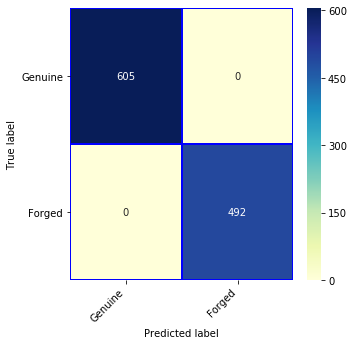

In [72]:
plot_cm(metrics.confusion_matrix(expected, predicted))

### 5. Evaluation of the selected model

In [73]:
# make predictions
expected = y_test
predicted = model.predict(X_test)

In [74]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       157
           1       0.97      0.97      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

[[153   4]
 [  3 115]]


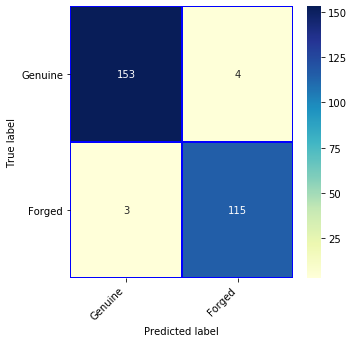

In [75]:
plot_cm(metrics.confusion_matrix(expected, predicted))

In [76]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [81]:
def visualize_tree_generate_dot(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("banknote_dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

In [84]:
feature_names = columns[:4]
visualize_tree_generate_dot(model, feature_names)

In [85]:
!cat banknote_dt.dot

digraph Tree {
node [shape=box] ;
0 [label="Variance <= 0.313\ngini = 0.495\nsamples = 1097\nvalue = [605, 492]"] ;
1 [label="Skewness <= 5.519\ngini = 0.31\nsamples = 532\nvalue = [102, 430]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Curtosis <= 6.739\ngini = 0.099\nsamples = 420\nvalue = [22, 398]"] ;
1 -> 2 ;
3 [label="Skewness <= 4.094\ngini = 0.013\nsamples = 306\nvalue = [2, 304]"] ;
2 -> 3 ;
4 [label="Variance <= -0.259\ngini = 0.007\nsamples = 295\nvalue = [1, 294]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 259\nvalue = [0, 259]"] ;
4 -> 5 ;
6 [label="Variance <= -0.244\ngini = 0.054\nsamples = 36\nvalue = [1, 35]"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 35\nvalue = [0, 35]"] ;
6 -> 8 ;
9 [label="Curtosis <= 1.312\ngini = 0.165\nsamples = 11\nvalue = [1, 10]"] ;
3 -> 9 ;
10 [label="gini = 0.0\nsamples = 10\nvalue = [0, 10]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue

In [92]:
import pydot
import matplotlib.image as mpimg

In [90]:
(graph,) = pydot.graph_from_dot_file('banknote_dt.dot')
graph.write_png('banknote_dt.png')

In [97]:
img = mpimg.imread('./banknote_dt.png')

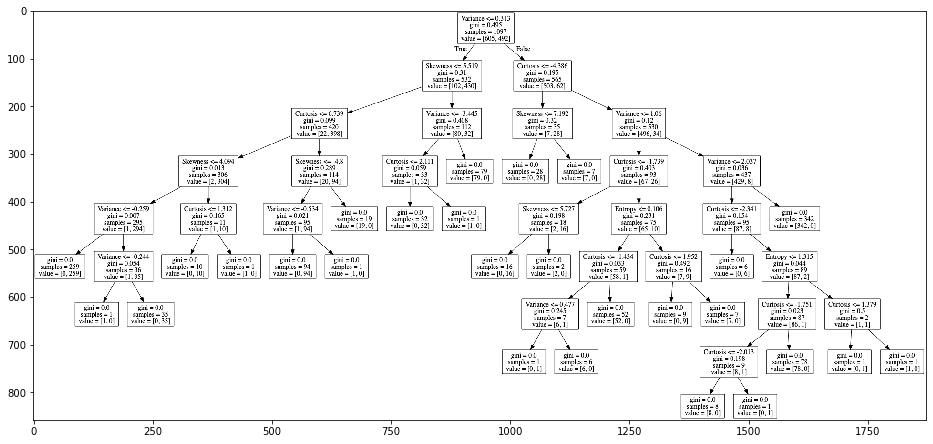

In [107]:
plt.close()
fig = plt.figure(figsize = (16,20))
imgplot = fig.gca().imshow(img)